## Wearable Tech: Week 1 Assignment

## Step 1

In [2]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime

# Read in the dataset

df = pd.read_csv("Data/TexasTechVBall.csv")

In [3]:
df

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %
0,8/19/19,PRAC,8/19/19,Erika,S,1595,2750,2.9,9.6,15.6,...,116,8,0,17.7,14.0,62,22.5,0,0,0
1,8-19-19#2,PRAC,8/19/19,Erika,S,1020,2750,1.9,8.4,14.6,...,62,2,1,21.7,13.4,60,22.5,0,0,0
2,8/19/19,PRAC,8/19/19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,194,126,8,22.2,18.8,75,25.0,3,2,5
3,8-19-19#2,PRAC,8/19/19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,53,41,2,20.4,17.9,72,25.0,4,0,4
4,8/19/19,PRAC,8/19/19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,121,113,91,28.9,26.5,88,30.0,7,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,vs k state 11-30,GAME,11/30/19,Sofia,MB,1776,3500,2.5,8.1,19.1,...,93,78,29,27.7,23.6,94,25.0,16,5,21
544,vs k state 11-30,GAME,11/30/19,Charlie,S,2723,3292,4.1,9.7,24.8,...,182,38,0,19.3,16.7,81,20.7,0,0,0
545,vs k state 11-30,GAME,11/30/19,Amy,S,3300,3300,5.0,12.3,97.1,...,40,3,0,18.9,12.9,54,24.0,0,0,0
546,vs k state 11-30,GAME,11/30/19,Kamaria,OH,869,2800,1.6,7.9,10.5,...,35,28,23,26.4,25.2,97,26.0,15,0,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EVENT NAME          548 non-null    object 
 1   EVENT TYPE          548 non-null    object 
 2   DATE                548 non-null    object 
 3   PLAYER NAME         548 non-null    object 
 4   POSITION            548 non-null    object 
 5   ENERGY              548 non-null    int64  
 6   MAX ENERGY          548 non-null    int64  
 7   SETS BY ENERGY      548 non-null    float64
 8   POWER               548 non-null    float64
 9   INTENSITY           548 non-null    float64
 10  STRESS              548 non-null    float64
 11  ACTIVE MINS         547 non-null    float64
 12  JUMPS               548 non-null    int64  
 13  JUMPS 15+           548 non-null    int64  
 14  JUMPS 20+           548 non-null    int64  
 15  HIGHEST JUMP (in)   547 non-null    float64
 16  AVG HI J

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Extracting week from the date
df['WEEK'] = df['DATE'].dt.week

/tmp/ipykernel_20549/1028085407.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WEEK'] = df['DATE'].dt.week


In [6]:
df

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %,WEEK
0,8/19/19,PRAC,2019-08-19,Erika,S,1595,2750,2.9,9.6,15.6,...,8,0,17.7,14.0,62,22.5,0,0,0,34
1,8-19-19#2,PRAC,2019-08-19,Erika,S,1020,2750,1.9,8.4,14.6,...,2,1,21.7,13.4,60,22.5,0,0,0,34
2,8/19/19,PRAC,2019-08-19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,126,8,22.2,18.8,75,25.0,3,2,5,34
3,8-19-19#2,PRAC,2019-08-19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,41,2,20.4,17.9,72,25.0,4,0,4,34
4,8/19/19,PRAC,2019-08-19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,113,91,28.9,26.5,88,30.0,7,2,9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,vs k state 11-30,GAME,2019-11-30,Sofia,MB,1776,3500,2.5,8.1,19.1,...,78,29,27.7,23.6,94,25.0,16,5,21,48
544,vs k state 11-30,GAME,2019-11-30,Charlie,S,2723,3292,4.1,9.7,24.8,...,38,0,19.3,16.7,81,20.7,0,0,0,48
545,vs k state 11-30,GAME,2019-11-30,Amy,S,3300,3300,5.0,12.3,97.1,...,3,0,18.9,12.9,54,24.0,0,0,0,48
546,vs k state 11-30,GAME,2019-11-30,Kamaria,OH,869,2800,1.6,7.9,10.5,...,28,23,26.4,25.2,97,26.0,15,0,15,48


## Step 2

Calculate the mean value for the total jumps, jumps over 15, jumps over 20 inches, and highest jumps for practice, scrimmage, and game days using the groupby function (grouping by Event Type and Position).

In [7]:
jump_metrics = ['JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)']
grouped_means = df.groupby(['EVENT TYPE', 'POSITION'])[jump_metrics].mean()

In [8]:
grouped_means

JUMPS   JUMPS 15+  JUMPS 20+  HIGHEST JUMP (in)
EVENT TYPE POSITION                                                      
GAME       MB         77.652174   64.391304  24.434783          25.591304
           OH         48.905660   39.981132  23.962264          26.794340
           S          96.583333   23.458333   0.791667          19.112500
PRAC       MB        132.010000   97.520000  22.450000          24.363000
           OH         81.157407   66.995370  32.972222          25.838605
           S         106.728814   23.991525   0.813559          19.203390
SCRIMMAGE  MB        159.333333  132.000000  35.666667          24.600000
           OH         90.000000   80.428571  53.142857          27.828571
           S         138.750000   37.250000   3.000000          20.225000

## Step 3

Calculate the means of the deceleration landing measures (ie. elevated landing, high landing, and alert landing) for players based on event type and position using the groupby function.

In [9]:
landing_metrics = ['ELEVATED LANDING %', 'HIGH LANDING %', 'ALERT LANDING %']
grouped_landing_means = df.groupby(['EVENT TYPE', 'POSITION'])[landing_metrics].mean()

In [10]:
grouped_landing_means

ELEVATED LANDING %  HIGH LANDING %  ALERT LANDING %
EVENT TYPE POSITION                                                     
GAME       MB                  7.739130        5.608696         2.304348
           OH                 12.867925       10.226415         2.622642
           S                   4.541667        2.833333         1.791667
PRAC       MB                  4.330000        3.420000         0.860000
           OH                  6.870370        5.361111         1.504630
           S                   1.245763        0.991525         0.271186
SCRIMMAGE  MB                  3.000000        2.666667         0.333333
           OH                 10.428571        6.285714         4.000000
           S                   3.750000        3.500000         0.250000

## Step 4

Plot each player for their percentage of alert landings during games (only) according to the week of the season.

<Figure size 1200x600 with 0 Axes>

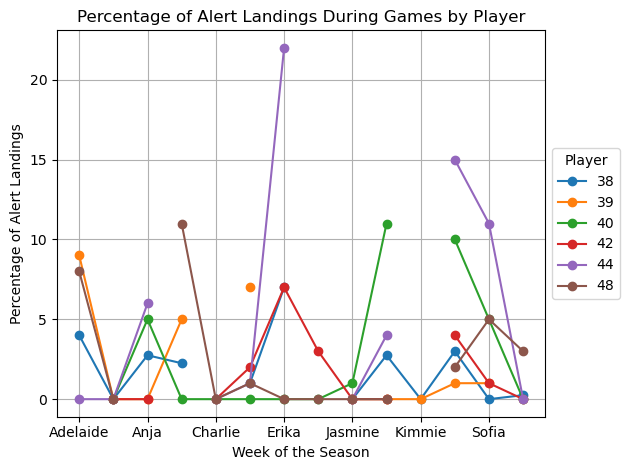

In [11]:
games_data = df[df['EVENT TYPE'] == 'GAME']

# Group by player and week, then calculate mean alert landing percentage
player_weekly_alert_landing = games_data.groupby(['PLAYER NAME', 'WEEK'])['ALERT LANDING %'].mean().unstack()

# Plotting each player's alert landing percentage during games
plt.figure(figsize=(12, 6))
player_weekly_alert_landing.plot(marker='o')
plt.title("Percentage of Alert Landings During Games by Player")
plt.xlabel("Week of the Season")
plt.ylabel("Percentage of Alert Landings")
plt.grid(True)
plt.legend(title="Player", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Step 5

Evaluate correlations (e.g. a correlation matrix) of the different vert measures to determine what factor(s) seem most highly correlated with the “elevated landing” measure (which is a combination of the “alert landing” and “high landing” measures).  Determine which other measures (outside of the deceleration measures) are most highly correlated with the “elevated landing” measure.  In addition to the correlation matrix, you could plot the measures that have the highest correlation with “elevated landing %”.  Use all sessions for your analyses (i.e. games, practices, and scrimmages)

/tmp/ipykernel_20549/2493568654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation with 'ELEVATED LANDING %':
ELEVATED LANDING %    1.000000
HIGH LANDING %        0.951221
ALERT LANDING %       0.734079
AVG HI JUMP (in)      0.493550
% MAX JUMP            0.485478
HIGHEST JUMP (in)     0.399277
JUMPS 20+             0.289582
MAX JUMP (in)         0.258932
STRESS                0.060701
MAX ENERGY            0.059255
WEEK                  0.059142
POWER                 0.050948
INTENSITY             0.048306
ENERGY                0.028239
JUMPS 15+            -0.002911
SETS BY ENERGY       -0.021264
ACTIVE MINS          -0.027281
JUMPS                -0.300237
Name: ELEVATED LANDING %, dtype: float64


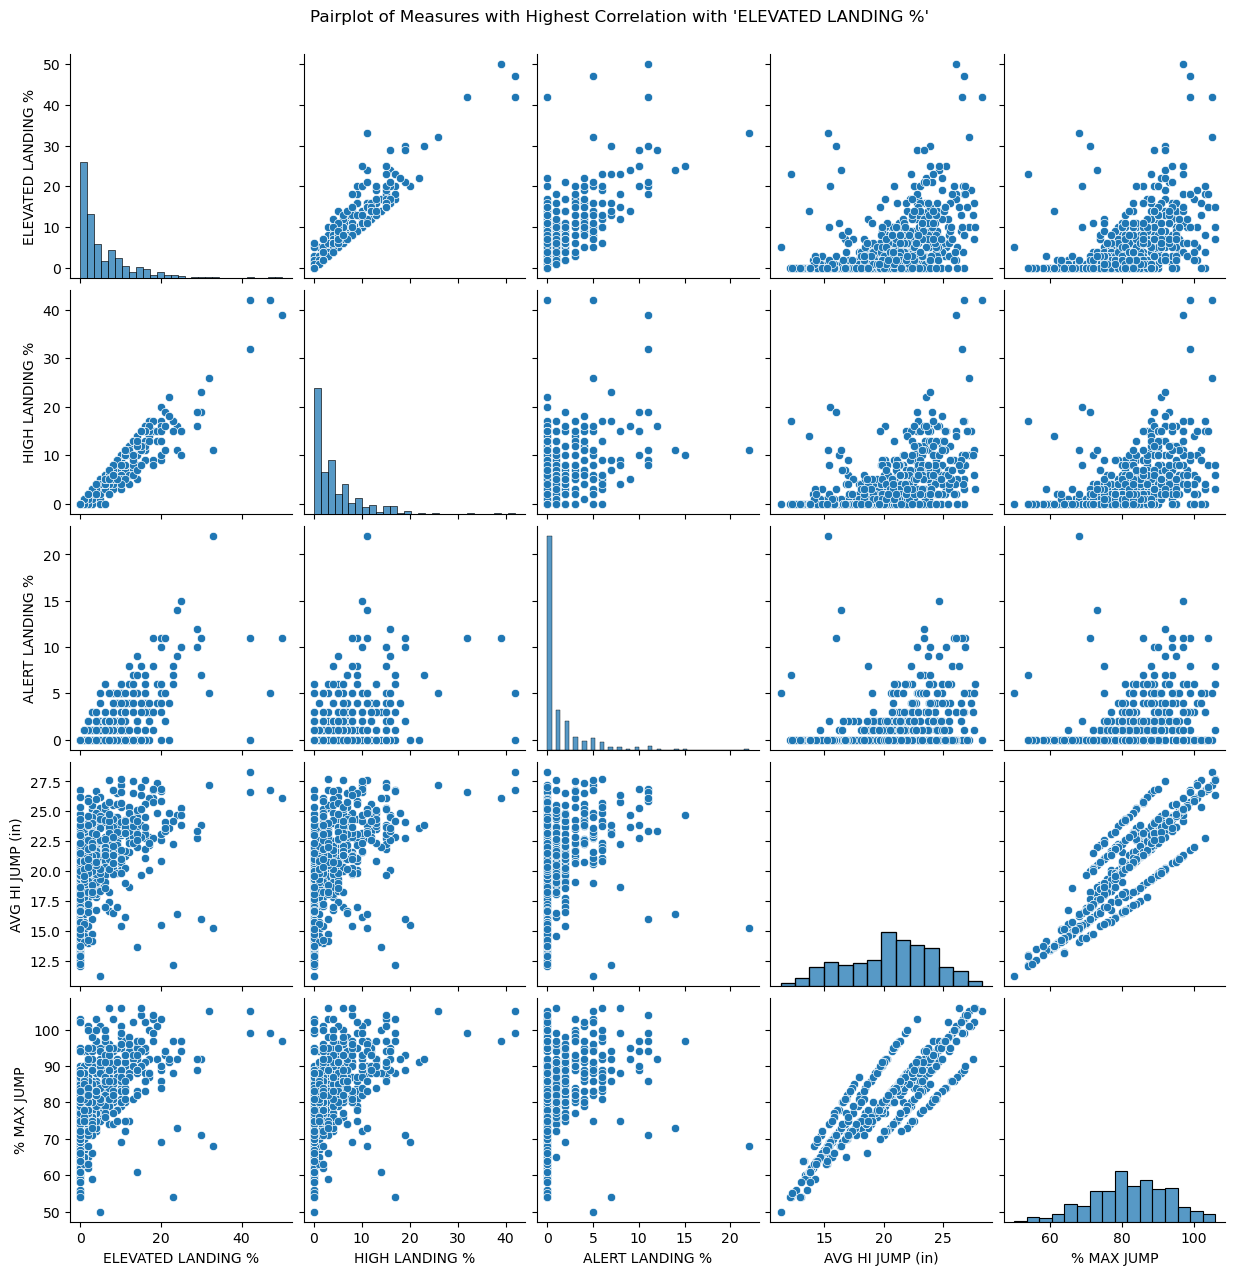

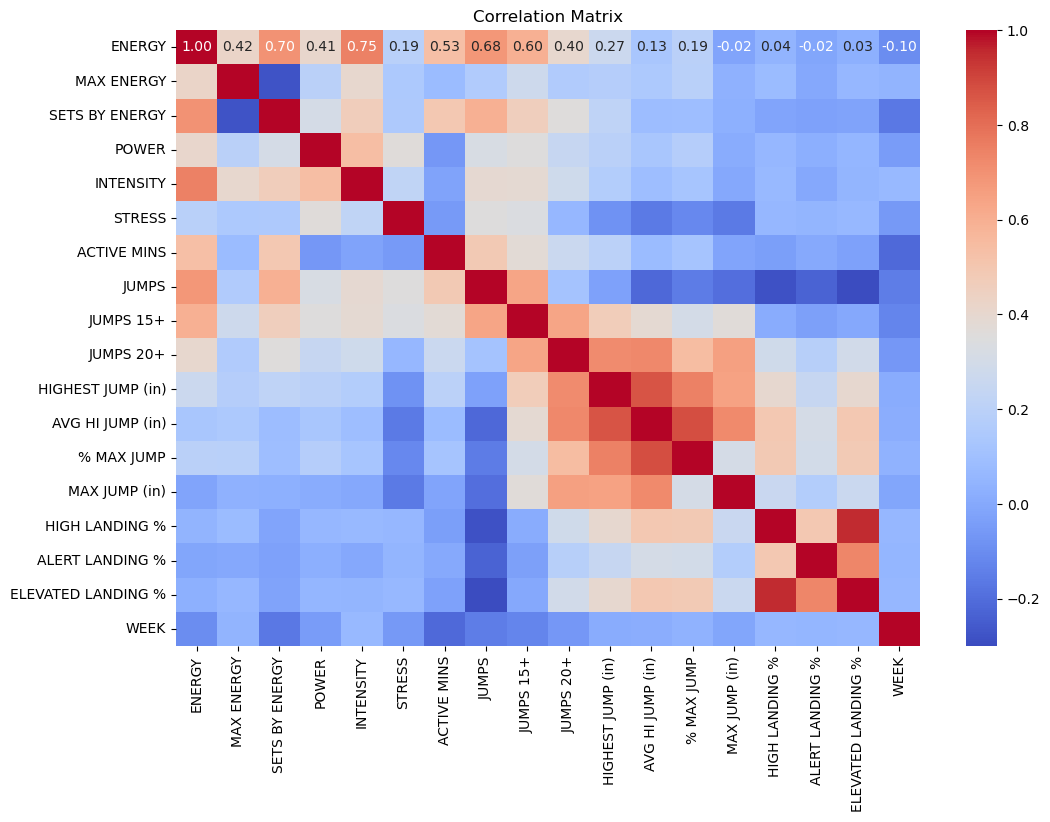

In [12]:
correlation_matrix = df.corr()

# Filter the correlation matrix to show correlations with the "elevated landing" measure
elevated_landing_correlation = correlation_matrix['ELEVATED LANDING %'].sort_values(ascending=False)

# Print the correlation values
print("Correlation with 'ELEVATED LANDING %':")
print(elevated_landing_correlation)

# Plot measures with highest correlation with "elevated landing %"
highest_correlated_measures = elevated_landing_correlation.head(5).index.tolist()  # Adjust the number of measures as needed
sns.pairplot(df[highest_correlated_measures])
plt.suptitle("Pairplot of Measures with Highest Correlation with 'ELEVATED LANDING %'", y=1.02)
plt.show()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()